In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('penguins.csv')

In [4]:
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [6]:
df.isnull().sum()


Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [7]:
df1=df.copy()

In [8]:
df1

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [9]:
df1.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex'],inplace=True)

In [10]:
df1.drop(columns='Unnamed: 0',inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [
    'island', 
    'sex', 
    'year', 
   
]
# Loop through the columns and apply LabelEncoder
for column in columns_to_encode:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])

In [12]:
y=df1.iloc[:,0]
X=df1.iloc[:,1:]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
clf=DecisionTreeClassifier()


In [16]:
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [17]:
y_pred=clf.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9552238805970149

In [19]:
from sklearn.tree import plot_tree


[Text(0.640625, 0.9166666666666666, 'x[3] <= 206.5\ngini = 0.639\nsamples = 266\nvalue = [119, 57, 90]'),
 Text(0.46875, 0.75, 'x[1] <= 44.65\ngini = 0.435\nsamples = 172\nvalue = [117, 55, 0]'),
 Text(0.5546875, 0.8333333333333333, 'True  '),
 Text(0.3125, 0.5833333333333334, 'x[1] <= 42.3\ngini = 0.094\nsamples = 122\nvalue = [116, 6, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[2] <= 16.65\ngini = 0.018\nsamples = 111\nvalue = [110, 1, 0]'),
 Text(0.125, 0.25, 'x[1] <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 103\nvalue = [103, 0, 0]'),
 Text(0.4375, 0.4166666666666667, 'x[5] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5, 0]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.625

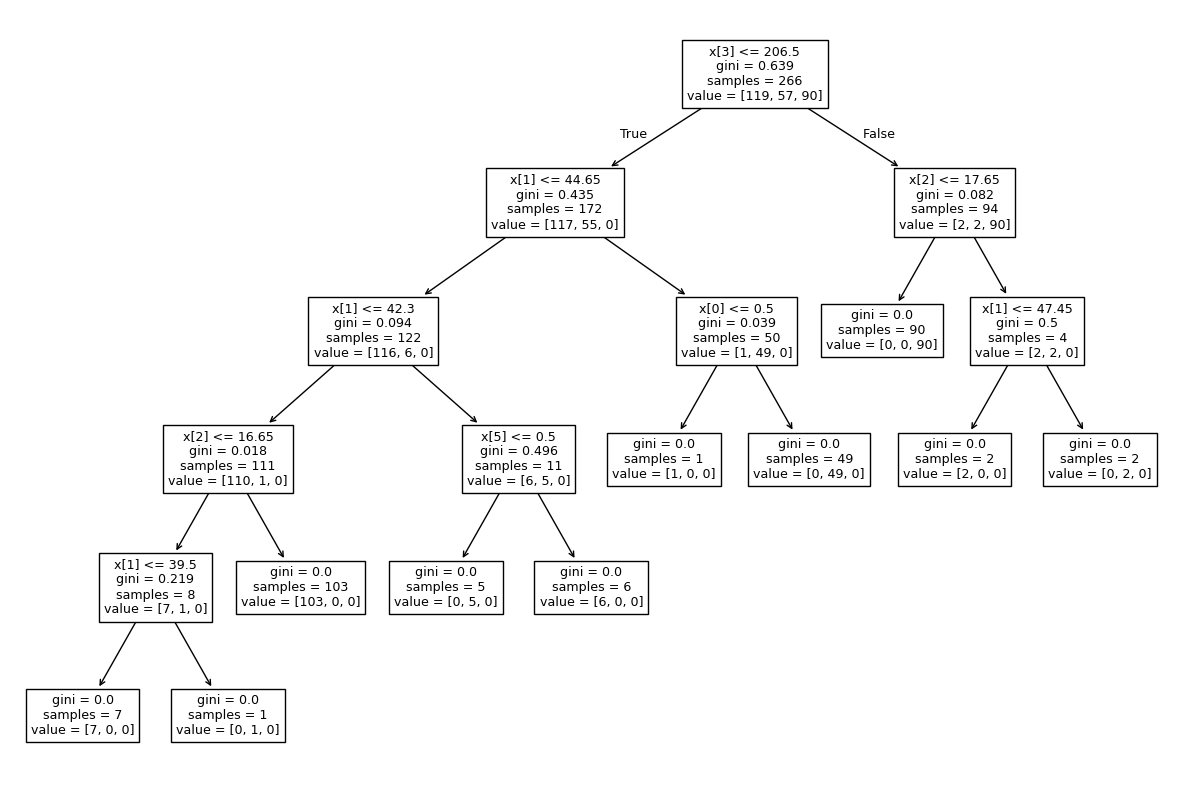

In [20]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

plot_tree(clf)

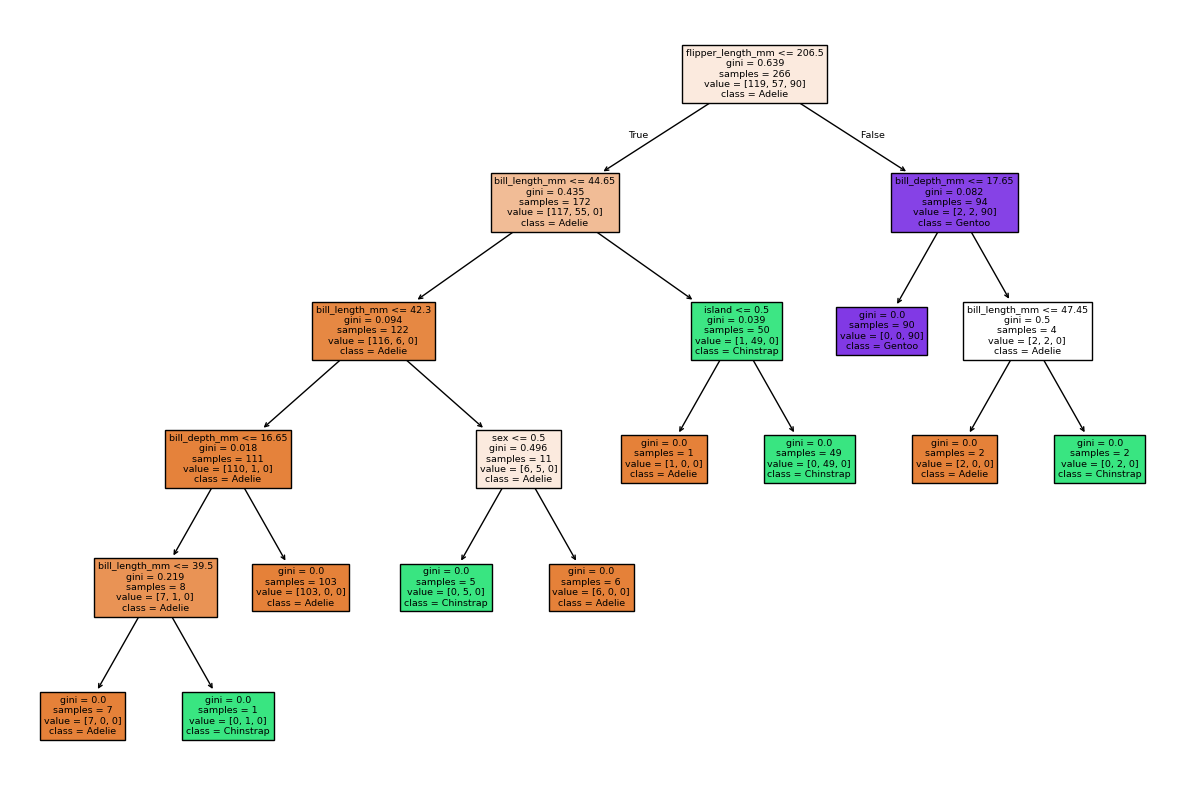

In [21]:
plt.figure(figsize=(15, 10))  
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.93      0.94        27
   Chinstrap       0.85      1.00      0.92        11
      Gentoo       1.00      0.97      0.98        29

    accuracy                           0.96        67
   macro avg       0.94      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.96      0.93      0.94        27
   Chinstrap       0.85      1.00      0.92        11
      Gentoo       1.00      0.97      0.98        29

    accuracy                           0.96        67
   macro avg       0.94      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[25,  2,  0],
       [ 0, 11,  0],
       [ 1,  0, 28]], dtype=int64)

<Figure size 1500x1000 with 0 Axes>

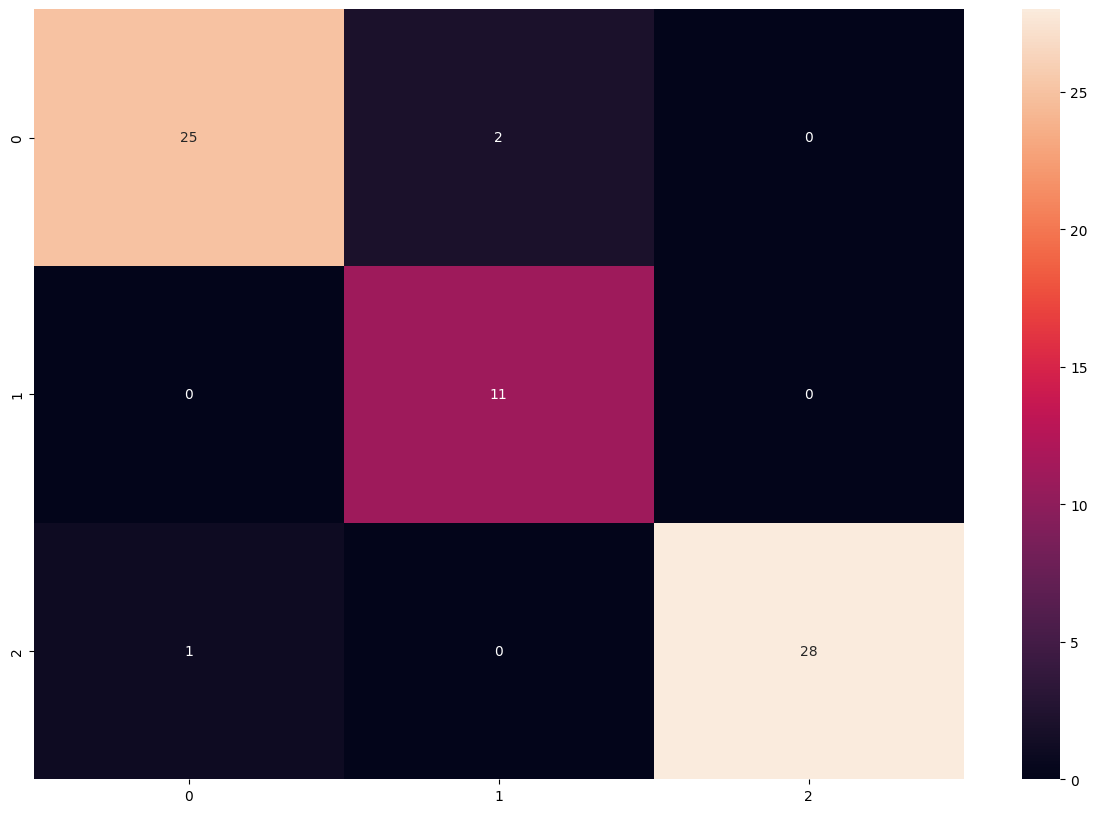

<Figure size 1500x1000 with 0 Axes>

In [36]:
sns.heatmap(data=conf_matrix,annot=True)
plt.figure(figsize=(15,10))